


#**Netcdf Handling**
**Author :** Siddik Barbhuiya(Siddikbarbhuiya@gmail.com)



**NetCDF** (Network Common Data Form) is a file format for storing scientific data. NetCDF files can contain multiple arrays of any shape and size. CSV (Comma Separated Values) files are plain text files that store data separated by commas. Excel files are spreadsheets that contain data in rows and columns.

In [ ]:
# Loading Modules
import xarray as xr
import numpy as np
import pandas as pd

Download the Data

In [ ]:
#!gdown --id 1PGKIhAHVN-LiR0FDwam7nbus3DgVBvT6

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1https://zenodo.org/record/5038653 



In [ ]:
# Load the dataset
df = xr.open_dataset('ncum_imdaa_reanl_HR_RH-2m_1979010100-1979123123.nc')

In [ ]:
#Printing the dataset
df

<xarray.Dataset>
Dimensions:    (time: 8754, longitude: 42, latitude: 34)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T06:00:00 ... 1979-12-31T23:00:00
  * longitude  (longitude) float64 83.04 83.16 83.28 83.4 ... 87.72 87.84 87.96
  * latitude   (latitude) float64 20.04 20.16 20.28 20.4 ... 23.76 23.88 24.0
Data variables:
    RH_2m      (time, latitude, longitude) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.9.8 (https://mpime...
    Conventions:          COARDS
    history:              Sat Sep 09 06:48:27 2023: cdo -f nc4c -z zip_4 copy...
    History:              created by wgrib2
    GRIB2_grid_template:  0
    CDO:                  Climate Data Operators version 1.9.8 (https://mpime...

***Dimension***

---
```
Dimensions:
time: 8754longitude: 42latitude: 34
```
This line shows the dimensions of the dataset.In this case,there are 3 dimensions:lat,lon and time.The numbers in the parenthesis indicate the size of each dimension.So there are 361 latitudes, 576 longitudes,and 1 timesteps in the dataset.


***Coordinates***


---


```
Coordinates:
time(time) datetime64[ns 1979-01-01T06:00:00 ... 1979-12-...
longitude (longitude) float64 83.04 83.16 83.28 ... 87.84 87.96
latitude (latitude) float64 20.04 20.16 20.28 ... 23.88
```
This section shows the coordinate variables that define the dimensions of the dataset. Each coordinate variable has a name in parentheses and a data type e.g. float64 for latitude and longitude, and datetime64 for time

***Data Variables***

---



```
RH_2m  (time, latitude, longitude) float32
...
```
This section shows the data variables contained in the dataset. Each variable has a name in parentheses and a data type which is float32 in this case. The dimensions of each variable are listed in parentheses.

***Indexes***

---




```
time       PandasIndex
longitude  PandasIndex
latitude   PandasIndex
```
The Indexes section of this example lists the index objects for each of the dataset's dimensions. In this case, the dataset has three dimensions: time, lat, and lon, and each of these dimensions has a PandasIndex object associated with it.

For example,thetime index would contain the dates and times corresponding to the dataset's time dimension, while the lat and lon indices would contain the latitude and longitude values corresponding to the dataset's latitude and longitude dimensions, respectively.


***Attributes***


---
This section shows any global attributes that are present in the dataset.Global attributes provide information about the whole dataset such as its title,creator and version.Each attribute has a name and a value.In this example, the Conventions attribute indicates that the dataset follows the **COARDS** metadata conventions, and the title attribute provides a brief description of the dataset.




# **Data Model**
The netCDF data model is based on three major components:



*   Variables
*   Dimensions
*   Attributes









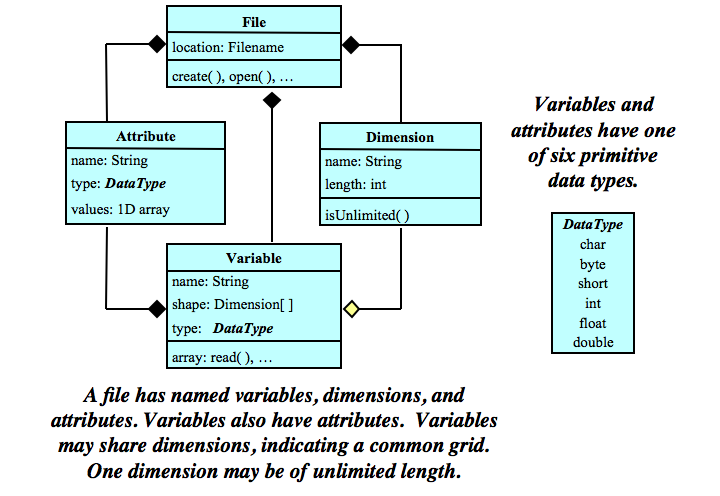

# **Dimensions**
Dimensions are used to define the shape of the data stored in a netcdf file.Each dimension is given a name,a length, and a tag indicating whether it is an unlimited dimension,which can be expanded to accommodate new data without rewriting the entire file

# **Variables**
Variables are used to store multidimensional arrays of data in a NetCDF file. Each variable is given a name, a data type, a shape defined by one or more dimensions, and a set of attributes that describe the data
# **Attributes**
Attributes are used to store metadata about the data in a NetCDF file. Each attribute is given a name and a value, which can be a scalar, a one-dimensional array, or a multidimensional array. Attributes can be attached to dimensions, variables, or the global attributes of the file itself.


# **Creating a Netcdf file**

In [ ]:
# Installation of netcdf
!apt-get install libnetcdf-dev netcdf-bin
!pip install netcdf4

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libnetcdf-dev is already the newest version (1:4.8.1-1).
libnetcdf-dev set to manually installed.
The following NEW packages will be installed:
  netcdf-bin
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 204 kB of archives.
After this operation, 557 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 netcdf-bin amd64 1:4.8.1-1 [204 kB]
Fetched 204 kB in 1s (171 kB/s)
Selecting previously unselected package netcdf-bin.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../netcdf-bin_1%3a4.8.1-1_amd64.deb ...
Unpacking netcdf-bin (1:4.8.1-1) ...
Setting up netcdf-bin (1:4.8.1-1) ...
Processing triggers for man-db (2.10.2-1) ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.6 MB/s e

In [ ]:
import netCDF4 as nc
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# creating a new NetCDF file
ncfile = nc.Dataset('temperature_pressure.nc','w')

# defining the dimensions of the data
time = ncfile.createDimension('time', None)
lat = ncfile.createDimension('lat', 10)
lon = ncfile.createDimension('lon', 10)

# creating variables for the data and set their attributes
times = ncfile.createVariable('time', np.float64, ('time',))
times.units = 'days since 2020-01-01 00:00:00'
times.long_name = 'Time'
lats = ncfile.createVariable('lat', np.float32, ('lat',))
lats.units = 'degrees_north'
lats.long_name = 'Latitude'
lons = ncfile.createVariable('lon', np.float32, ('lon',))
lons.units = 'degrees_east'
lons.long_name = 'Longitude'
temp = ncfile.createVariable('temperature', np.float32, ('time', 'lat', 'lon',))
temp.units = 'Celsius'
temp.long_name = 'Temperature'
pres = ncfile.createVariable('pressure', np.float32, ('time', 'lat', 'lon',))
pres.units = 'hPa'
pres.long_name = 'Pressure'

# creating some fake temperature and pressure data to write to the file
num_times = 5
num_lats = 10
num_lons = 10
times_data = np.arange(num_times)
lats_data = np.linspace(-90, 90, num_lats)
lons_data = np.linspace(-180, 180, num_lons)
temp_data = np.random.randint(-30, 40, (num_times, num_lats, num_lons))
pres_data = np.random.randint(900, 1100, (num_times, num_lats, num_lons))

# writing the data to the variables in the NetCDF file
times[:] = times_data
lats[:] = lats_data
lons[:] = lons_data
temp[:] = temp_data
pres[:] = pres_data

# setting metadata for the NetCDF file
ncfile.title = 'Temperature and Pressure Data'
ncfile.history = 'Created on February 15, 2023'
ncfile.source = 'Generated by Python script'

# closing the NetCDF file
ncfile.close()

***ncdump***

`ncdump` is a command line.It is used to exibits the metadata and data of a netCDF file so that we humans can read.Basically, id is used to show the contents of netCDF files.




```
ncdump [-c|-h] [-v ...] [-k] [-t] [-s] [-b lang] [-f lang]
       [-l len] [-n name] [-p fdig[,ddig]] [-x] file.nc

  [-c]               Coordinate variable data and header information
  [-h]               Header information only, no data
  [-v var1[,...]]    Data for variable(s) var1,... only
  [-k]               Output kind of netCDF file
  [-t]               Output time data as ISO date-time strings

  [-s]               Output special (virtual) attributes
  [-b [c|f]]         Brief annotations for C or Fortran indices in data
  [-f [c|f]]         Full annotations for C or Fortran indices in data
  [-l len]           Line length maximum in data section (default 80)
  [-n name]          Name for netCDF (default derived from file name)
  [-p n[,n]]         Display floating-point values with less precision
  [-x]               Output NcML instead of CDL (netCDF-3 files only)

  file.nc            Name of netCDF file
```



# **Trying with some random data**

In [ ]:
#downloading the file
!wget -nc https://www.unidata.ucar.edu/software/netcdf/examples/ECMWF_ERA-40_subset.nc -O ECMWF_ERA-40_subset.nc

--2023-09-20 11:36:18--  https://www.unidata.ucar.edu/software/netcdf/examples/ECMWF_ERA-40_subset.nc
Resolving www.unidata.ucar.edu (www.unidata.ucar.edu)... 128.117.149.20
Connecting to www.unidata.ucar.edu (www.unidata.ucar.edu)|128.117.149.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22165040 (21M) [application/x-netcdf]
Saving to: ‘ECMWF_ERA-40_subset.nc’

ECMWF_ERA-40_subset 100%[===================>]  21.14M  4.73MB/s    in 7.7s    

2023-09-20 11:36:27 (2.74 MB/s) - ‘ECMWF_ERA-40_subset.nc’ saved [22165040/22165040]



In [ ]:
#Applying ncdump
!ncdump -ct ncum_imdaa_reanl_HR_RH-2m_1979010100-1979123123.nc

netcdf ncum_imdaa_reanl_HR_RH-2m_1979010100-1979123123 {
dimensions:
	time = UNLIMITED ; // (8754 currently)
	longitude = 42 ;
	latitude = 34 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "verification time generated by wgrib2 function verftime()" ;
		time:units = "seconds since 1970-01-01 00:00:00.0 0:00" ;
		time:calendar = "standard" ;
		time:axis = "T" ;
	double longitude(longitude) ;
		longitude:standard_name = "longitude" ;
		longitude:long_name = "longitude" ;
		longitude:units = "degrees_east" ;
		longitude:axis = "X" ;
	double latitude(latitude) ;
		latitude:standard_name = "latitude" ;
		latitude:long_name = "latitude" ;
		latitude:units = "degrees_north" ;
		latitude:axis = "Y" ;
	float RH_2m(time, latitude, longitude) ;
		RH_2m:long_name = "Relative Humidity" ;
		RH_2m:units = "percent" ;
		RH_2m:_FillValue = 9.999e+20f ;
		RH_2m:missing_value = 9.999e+20f ;
		RH_2m:short_name = "RH_2maboveground" ;
		RH_2m:level = "2 m above ground" ;

**Using Xarray for Netcdf**

Xarray is a powerful python library for working with NerCDF format files. It offers a wide range of functions that are similar to those in pandas and numpy, making it easy to manipulate and analyze multidimensional arrays of data.The two primary data structures in Xarray are Dataarray and Dataset, both of which are similar to numpy.ndarrays.Xarray also supports groupby operations, similar to those in pandas , which can be used for more complex data manipulation.Additionally,Xarray provides simple and intuitive visualization capabilities

In [ ]:
# Importing xarray
import xarray as xr
# Opening the netcdf file
data_set=xr.open_dataset('ncum_imdaa_reanl_HR_RH-2m_1979010100-1979123123.nc')

In [ ]:
data_set

<xarray.Dataset>
Dimensions:    (time: 8754, longitude: 42, latitude: 34)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T06:00:00 ... 1979-12-31T23:00:00
  * longitude  (longitude) float64 83.04 83.16 83.28 83.4 ... 87.72 87.84 87.96
  * latitude   (latitude) float64 20.04 20.16 20.28 20.4 ... 23.76 23.88 24.0
Data variables:
    RH_2m      (time, latitude, longitude) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.9.8 (https://mpime...
    Conventions:          COARDS
    history:              Sat Sep 09 06:48:27 2023: cdo -f nc4c -z zip_4 copy...
    History:              created by wgrib2
    GRIB2_grid_template:  0
    CDO:                  Climate Data Operators version 1.9.8 (https://mpime...

In [ ]:
data_set.RH_2m

<xarray.DataArray 'RH_2m' (time: 8754, latitude: 34, longitude: 42)>
[12500712 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T06:00:00 ... 1979-12-31T23:00:00
  * longitude  (longitude) float64 83.04 83.16 83.28 83.4 ... 87.72 87.84 87.96
  * latitude   (latitude) float64 20.04 20.16 20.28 20.4 ... 23.76 23.88 24.0
Attributes:
    long_name:   Relative Humidity
    units:       percent
    short_name:  RH_2maboveground
    level:       2 m above ground

Here we can see all the information about the variable.

In [ ]:
RH_2m=data_set.RH_2m

**Cutting a subset**

In [ ]:
data_set.variables['RH_2m'][0:2,0:4,0:3]

<xarray.Variable (time: 2, latitude: 4, longitude: 3)>
[24 values with dtype=float32]
Attributes:
    long_name:   Relative Humidity
    units:       percent
    short_name:  RH_2maboveground
    level:       2 m above ground

This code cuts a subset of the `RH_2m` variable from the netCDF dataset data_set. The subset contains the first two time steps, the first four latitudes, and the first three longitudes. The resulting array is a 3-dimensional numpy array with shape (2, 4, 3) containing the values of the `RH_2m` variable at the selected indices.

In [ ]:
data_set.RH_2m.isel(time=slice(0,2), latitude=slice(0,4), longitude=slice(0,3))

<xarray.DataArray 'RH_2m' (time: 2, latitude: 4, longitude: 3)>
[24 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T06:00:00 1979-01-01T07:00:00
  * longitude  (longitude) float64 83.04 83.16 83.28
  * latitude   (latitude) float64 20.04 20.16 20.28 20.4
Attributes:
    long_name:   Relative Humidity
    units:       percent
    short_name:  RH_2maboveground
    level:       2 m above ground

# **Dimensions of a variable**

In [ ]:
data_set.RH_2m.dims

('time', 'latitude', 'longitude')

# **Coordinates of a variable**

In [ ]:
data_set.RH_2m.coords

Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T06:00:00 ... 1979-12-31T23:00:00
  * longitude  (longitude) float64 83.04 83.16 83.28 83.4 ... 87.72 87.84 87.96
  * latitude   (latitude) float64 20.04 20.16 20.28 20.4 ... 23.76 23.88 24.0

# **Atrributes of a variable**

In [ ]:
data_set.RH_2m.attrs

{'long_name': 'Relative Humidity',
 'units': 'percent',
 'short_name': 'RH_2maboveground',
 'level': '2 m above ground'}

# **Values of the variable**

In [ ]:
data_set.RH_2m.values

array([[[45.444016, 44.475266, 44.944016, ..., 53.225266, 53.569016,
         53.725266],
        [43.600266, 44.475266, 44.694016, ..., 52.537766, 52.944016,
         53.225266],
        [44.069016, 43.694016, 43.787766, ..., 51.819016, 52.256516,
         52.694016],
        ...,
        [51.194016, 51.162766, 50.787766, ..., 45.444016, 45.381516,
         45.381516],
        [51.912766, 50.787766, 50.912766, ..., 44.725266, 44.850266,
         45.100266],
        [52.475266, 52.194016, 52.600266, ..., 43.944016, 44.100266,
         44.475266]],

       [[39.393425, 39.299675, 40.049675, ..., 52.987175, 53.268425,
         53.487175],
        [38.455925, 39.705925, 39.924675, ..., 52.268425, 52.643425,
         53.018425],
        [39.987175, 39.018425, 39.112175, ..., 51.643425, 52.143425,
         52.580925],
        ...,
        [46.768425, 46.643425, 46.612175, ..., 42.674675, 42.737175,
         42.830925],
        [47.518425, 47.049675, 47.424675, ..., 42.268425, 42.424675,
   

# ***Pulling out the data of 3rd July,1979***

In [ ]:
data_set.sel(time="1979-07-03")

<xarray.Dataset>
Dimensions:    (time: 24, longitude: 42, latitude: 34)
Coordinates:
  * time       (time) datetime64[ns] 1979-07-03 ... 1979-07-03T23:00:00
  * longitude  (longitude) float64 83.04 83.16 83.28 83.4 ... 87.72 87.84 87.96
  * latitude   (latitude) float64 20.04 20.16 20.28 20.4 ... 23.76 23.88 24.0
Data variables:
    RH_2m      (time, latitude, longitude) float32 83.91 78.19 ... 92.28 92.12
Attributes:
    CDI:                  Climate Data Interface version 1.9.8 (https://mpime...
    Conventions:          COARDS
    history:              Sat Sep 09 06:48:27 2023: cdo -f nc4c -z zip_4 copy...
    History:              created by wgrib2
    GRIB2_grid_template:  0
    CDO:                  Climate Data Operators version 1.9.8 (https://mpime...

This code selects the data corresponding to a specific time point, which is 1979-07-03. It uses the sel() method of xarray to select a single time slice along the time dimension.we can also add other dimensions

**Nearest Indexing**

In [ ]:
data_set.sel(longitude=84.3,method='nearest')

<xarray.Dataset>
Dimensions:    (time: 8754, latitude: 34)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T06:00:00 ... 1979-12-31T23:00:00
    longitude  float64 84.24
  * latitude   (latitude) float64 20.04 20.16 20.28 20.4 ... 23.76 23.88 24.0
Data variables:
    RH_2m      (time, latitude) float32 35.79 35.69 36.1 ... 70.42 76.17 79.76
Attributes:
    CDI:                  Climate Data Interface version 1.9.8 (https://mpime...
    Conventions:          COARDS
    history:              Sat Sep 09 06:48:27 2023: cdo -f nc4c -z zip_4 copy...
    History:              created by wgrib2
    GRIB2_grid_template:  0
    CDO:                  Climate Data Operators version 1.9.8 (https://mpime...

This code provide us the data at the longitude closest to 84.3 degrees.The sel() method is used to select data along a dimension. In this case, we are selecting data along the longitude dimension, with the value closest to 84.3 degrees. Here, we are using 'nearest' method which finds the nearest value to the given coordinate along given dimension.

In [ ]:
data_set.sel(longitude=[83,85,86],latitude=[20.3,21.],method='nearest')

<xarray.Dataset>
Dimensions:    (time: 8754, longitude: 3, latitude: 2)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T06:00:00 ... 1979-12-31T23:00:00
  * longitude  (longitude) float64 83.04 84.96 86.04
  * latitude   (latitude) float64 20.28 21.0
Data variables:
    RH_2m      (time, latitude, longitude) float32 44.07 56.73 ... 87.04 97.95
Attributes:
    CDI:                  Climate Data Interface version 1.9.8 (https://mpime...
    Conventions:          COARDS
    history:              Sat Sep 09 06:48:27 2023: cdo -f nc4c -z zip_4 copy...
    History:              created by wgrib2
    GRIB2_grid_template:  0
    CDO:                  Climate Data Operators version 1.9.8 (https://mpime...

The nearest values to longitude values of [240, 125, 234] and latitude values of [40.3, 50.3] will be produced as output.

# **Pulling out data for time index 0, lat index 2, and lon index 3**

In [ ]:
data_set.RH_2m.isel(time=0,latitude=5,longitude=3)

<xarray.DataArray 'RH_2m' ()>
array(47.444016, dtype=float32)
Coordinates:
    time       datetime64[ns] 1979-01-01T06:00:00
    longitude  float64 83.4
    latitude   float64 20.64
Attributes:
    long_name:   Relative Humidity
    units:       percent
    short_name:  RH_2maboveground
    level:       2 m above ground

Here, `.isel()` method is used to select the data based on the index values for the dimensions specified in the parentheses.We are trying to extract the value fo RH_2m at the first time step, latitude index 2 and longitude index 3.

# **Slicing**

In [ ]:
data_set.RH_2m.isel(latitude=slice(10))

<xarray.DataArray 'RH_2m' (time: 8754, latitude: 10, longitude: 42)>
array([[[45.444016, 44.475266, ..., 53.569016, 53.725266],
        [43.600266, 44.475266, ..., 52.944016, 53.225266],
        ...,
        [39.912766, 42.444016, ..., 50.631516, 50.287766],
        [50.944016, 49.975266, ..., 51.756516, 50.912766]],

       [[39.393425, 39.299675, ..., 53.268425, 53.487175],
        [38.455925, 39.705925, ..., 52.643425, 53.018425],
        ...,
        [36.393425, 38.924675, ..., 50.518425, 49.705925],
        [44.580925, 44.205925, ..., 51.330925, 50.393425]],

       ...,

       [[81.03175 , 85.28175 , ..., 69.71925 , 69.063   ],
        [83.2505  , 80.59425 , ..., 70.0005  , 68.84425 ],
        ...,
        [65.2505  , 66.90675 , ..., 71.688   , 71.3755  ],
        [92.34425 , 93.8755  , ..., 72.313   , 71.90675 ]],

       [[90.1987  , 87.41745 , ..., 70.2612  , 69.91745 ],
        [85.1987  , 88.8862  , ..., 70.41745 , 70.29245 ],
        ...,
        [73.3237  , 78.41745 , ..., 71.54245 , 71.72995 ],
        [84.54245 , 86.85495 , ..., 72.22995 , 72.16745 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T06:00:00 ... 1979-12-31T23:00:00
  * longitude  (longitude) float64 83.04 83.16 83.28 83.4 ... 87.72 87.84 87.96
  * latitude   (latitude) float64 20.04 20.16 20.28 20.4 ... 20.88 21.0 21.12
Attributes:
    long_name:   Relative Humidity
    units:       percent
    short_name:  RH_2maboveground
    level:       2 m above ground

Here, isel is used to select the data along the latitude dimension using a slice object slice(10). This selects all the indices less than 10 along the latitude dimension. The resulting xarray dataset contains all the values of the Rh_2m variable along the time, latitude, and longitude dimensions, but only for the selected indices along the latitude dimension

**Seasonal groups**

In [ ]:
data_set.groupby('time.season')

DatasetGroupBy, grouped over 'season'
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

The groupby method in xarray allows us to group data along one or more dimensions, and apply an aggregation function such as mean,sum,max etc to each group. In this case, the code `data_set.groupby('time.season')` is grouping the data in the dataset ds along the time dimension, using the season attribute. This will group the data into four groups, one for each season (DJF, MAM, JJA, SON

**Seasonal mean**

Now we've learned how to group data base on their seasons in the previous code cell.

But we will now group the data in data_set by the season component of the time coordinate and then take mean of each group.

In [ ]:
seasonal_mean=data_set.groupby('time.season').mean()
seasonal_mean

<xarray.Dataset>
Dimensions:    (longitude: 42, latitude: 34, season: 4)
Coordinates:
  * longitude  (longitude) float64 83.04 83.16 83.28 83.4 ... 87.72 87.84 87.96
  * latitude   (latitude) float64 20.04 20.16 20.28 20.4 ... 23.76 23.88 24.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    RH_2m      (season, latitude, longitude) float32 61.52 61.1 ... 67.19 67.44
Attributes:
    CDI:                  Climate Data Interface version 1.9.8 (https://mpime...
    Conventions:          COARDS
    history:              Sat Sep 09 06:48:27 2023: cdo -f nc4c -z zip_4 copy...
    History:              created by wgrib2
    GRIB2_grid_template:  0
    CDO:                  Climate Data Operators version 1.9.8 (https://mpime...

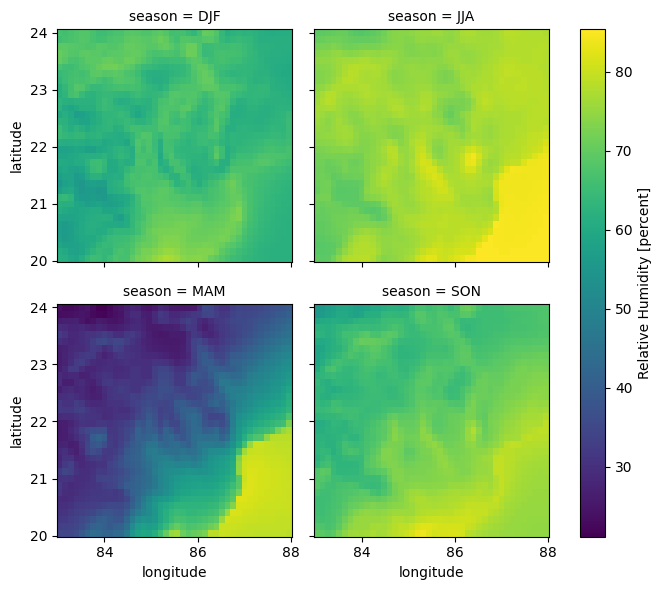

In [ ]:
seasonal_mean.RH_2m.plot(col='season',col_wrap=2)

we have created a plot of seasonal mean values of the RH_2m variable in the loaded data_set dataset. The col parameter is set to 'season', which means that each season will be plotted in a separate column. The col_wrap parameter is set to 2, which means that there will be a maximum of two columns of plots, and if there are more than two seasons, the extra plots will be added to a new row.

# **Ploting**

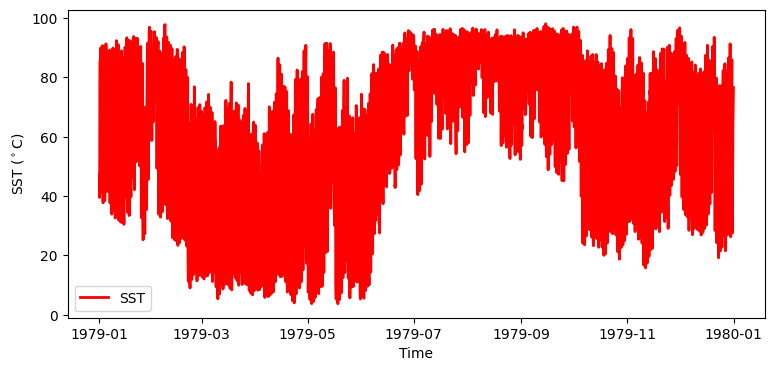

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr



# Extract the necessary data variables
sst = data_set['RH_2m'].data
time = pd.to_datetime(data_set['time'].data)
lat = data_set['latitude'].data
lon = data_set['longitude'].data

# Calculate the mean sea surface temperature over all longitudes
sst_zm = np.mean(sst, axis=2)

# Extract the tropical region (70°S to 110°S latitude)
sst_tropics = sst_zm[:, 20:23]

# Calculate the mean sea surface temperature over the tropical region
sst_final = np.mean(sst_tropics, axis=1)

# Create the plot
plt.figure(figsize=(9, 4))
plt.plot(time, sst_final, color='r', linewidth=2., linestyle='-', alpha=1., label='SST')
#plt.title('Sea Surface Temperature ($^\circ$C) in the Tropics')
plt.xlabel('Time')
plt.ylabel('SST ($^\circ$C)')
plt.legend(fontsize=10)
plt.show()


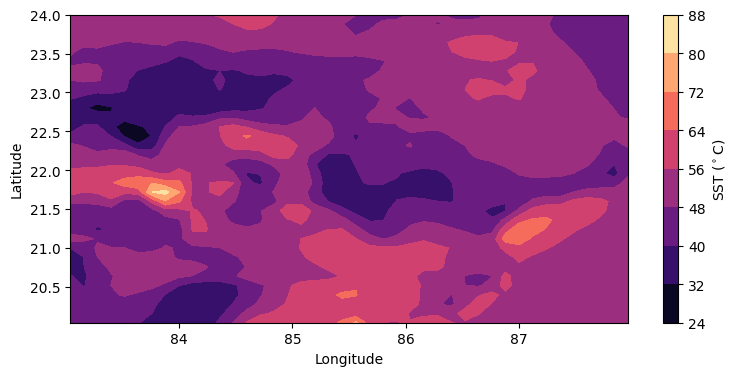

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr


# Extract the necessary variables
sst = data_set['RH_2m'].data
time = pd.to_datetime(data_set['time'].data)
lat = data_set['latitude'].data
lon = data_set['longitude'].data

# Create the contour plot
plt.figure(figsize=(9, 4))
plt.contourf(lon, lat,sst[0, :, :],cmap='magma')
plt.colorbar(label='SST ($^\circ$C)')
#plt.title('Sea Surface Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
!wget -nc https://downloads.psl.noaa.gov/Datasets/noaa.oisst.v2/icec.mnmean.nc

--2023-09-20 12:55:43--  https://downloads.psl.noaa.gov/Datasets/noaa.oisst.v2/icec.mnmean.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.86
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64039040 (61M) [application/x-netcdf]
Saving to: ‘icec.mnmean.nc’

icec.mnmean.nc      100%[===================>]  61.07M  15.6MB/s    in 4.2s    

2023-09-20 12:55:48 (14.6 MB/s) - ‘icec.mnmean.nc’ saved [64039040/64039040]



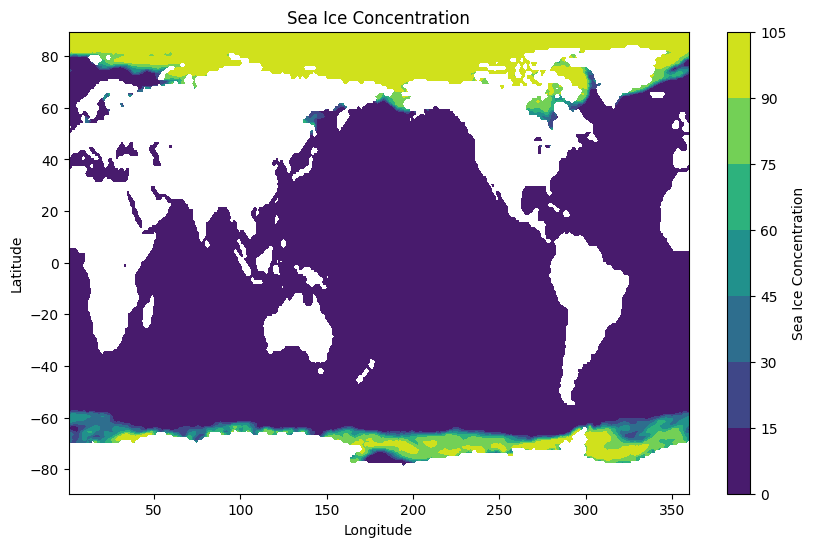

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Load the netCDF file
data = xr.open_dataset('icec.mnmean.nc')

# Extract the necessary variables
lon = data.lon.data
lat = data.lat.data
icec = data.icec.data

# Create a contour plot of sea ice concentration
plt.figure(figsize=(10, 6))
plt.contourf(lon, lat, icec[0, :, :])
plt.colorbar(label='Sea Ice Concentration')
plt.title('Sea Ice Concentration')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# **CDO(Climate Data Operators)**


---
CDO is a collection of command line tools specially designed for working with climate and weather data.It provides a wide range of operations and functionalities to manipulate, analyze and process climate data.



1.   File information (info, sinfo, diff, ...)
2.  File operations (copy, cat, merge, split*, ...)
3. Selection (selcode, selvar, sellevel, seltimestep, ...)
4. Missing values (setctomiss, setmisstoc, setrtomiss)
5. Arithmetic (add, sub, mul, div, ...)
Mathematical functions (sqrt, exp, log, sin, cos, ...)
6. Comparison (eq, ne, le, lt, ge, gt, ...)
7. Conditions (ifthen, ifnotthen, ifthenc, ifnotthenc)
8. Field statistics (fldsum, fldavg, fldstd, fldmin, fldmax, ...)
9. Vertical statistics (vertsum, vertavg, vertstd, vertmin, ...)
9. Time range statistics (timavg, yearavg, monavg, dayavg, ...)
10. Field interpolation (remapbil, remapcon, remapdis, ...)
11. Vertical interpolation (ml2pl, ml2hl)
Time interpolation (inttime, intyear)


To install CDO in Colab, we can use the following snippet:

`!apt-get install -y cdo`

▶ To concatenate and merge files:



```
!cdo merge file1.nc file2.nc file3.nc merged.nc
Here, file1.nc ,file2.nc ,file3.nc are merged together into merged.nc file
```



▶ To convert grib file to netcdf file:



```
!cdo -f nc copy file.grb file.nc
```


▶ TO shift Longitude of data from 0:360 to -180:180:

`!cdo sellonlatbox,-180,180,-90,90 input.nc output.nc`
▶ To calculate statistical mean:

`!cdo timmean input.nc timmean.nc`
▶ To apply mathematical and statistical operations:



```
!cdo add input1.nc input2.nc sum.nc
!cdo mul input1.nc input2.nc product.nc
```


▶ To perform time series analysis and temporal aggregations:



```
!cdo yearmean input.nc yearly_mean.nc
!cdo monmean input.nc monthly_mean.nc
```


**Note that the '!' at the beginning of the command is used to execute shell commnads within the Colab environment.**

In [ ]:
!apt-get install -y cdo

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  binfmt-support fonts-dejavu-core fonts-dejavu-extra fonts-droid-fallback
  fonts-font-awesome fonts-lato fonts-lyx fonts-noto-mono fonts-urw-base35
  ghostscript libcdi0 libclang-cpp11 libdxflib3 libeccodes-data libeccodes0
  libeckit0d libevdev2 libffi-dev libfftw3-double3 libgs9 libgs9-common
  libgudev-1.0-0 libidn12 libijs-0.35 libimagequant0 libinput-bin libinput10
  libjbig2dec0 liblbfgsb0 libllvm11 liblzf1 liblzo2-2 libmagics++-data
  libmagplus3v5 libmd4c0 libmtdev1 libodc-0d libpfm4 libqt5core5a libqt5dbus5
  libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libraqm0 librsync2
  libterralib3 libwacom-bin libwacom-common libwacom9 libxcb-icccm4
  libxcb-image0 libxcb-keysyms1 libxcb-render-util0 libxcb-util1
  libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1 libxkbcommon-x11-0 libxsimd-dev
  libz3-4 libz3-dev llvm-11 llvm-11-dev ll

In [ ]:
!cdo merge MERRA2_100.instM_2d_asm_Nx.198001.SUB.nc ncum_imdaa_reanl_HR_RH-2m_1979010100-1979123123.nc merged.nc

File merged.nc already exists, overwrite? (yes/no): ^C


In [ ]:
 xr.open_dataset('merged.nc')

<xarray.Dataset>
Dimensions:    (time: 1, lon: 576, lat: 361, longitude: 42, latitude: 34)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01
  * lon        (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat        (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * longitude  (longitude) float64 83.04 83.16 83.28 83.4 ... 87.72 87.84 87.96
  * latitude   (latitude) float64 20.04 20.16 20.28 20.4 ... 23.76 23.88 24.0
Data variables:
    T2M        (lat, lon) float32 ...
    RH_2m      (time, latitude, longitude) float32 ...
Attributes: (12/33)
    CDI:                               Climate Data Interface version 2.0.4 (...
    Conventions:                       CF-1
    History:                           Original file generated: Thu May  7 21...
    Filename:                          MERRA2_100.instM_2d_asm_Nx.198001.nc4
    Comment:                           GMAO filename: d5124_m2_jan79.inst1_2d...
    Institution:                       NASA Global Modeling and Assimilation ...
    ...                                ...
    identifier_product_doi:            10.5067/5ESKGQTZG7FO
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:00:00.000000
    history_L34RS:                     'Created by L34RS v1.4.3 @ NASA GES DI...
    history:                           Wed Sep 20 13:12:18 2023: cdo merge ME...
    CDO:                               Climate Data Operators version 2.0.4 (...

# ***NCO(netCDF Operators)***
NCO (netCDF Operators) is typically used when we need to perform advanced operations on netCDF .



```
Some NCO command line operators to apply on netCDF files:

ncap2      - arithmetic processor
ncatted    - attribute editor
ncbo       - binary operator
ncdiff     - differencer
ncea       - ensemble averager
ncecat     - ensemble concatenator
ncflint    - file interpolator
ncks       - kitchen sink (extract, cut, paste, print data)
ncpdq      - permute dimensions quickly
ncra       - running averager
ncrcat     - record concatenator
ncrename   - renamer
ncwa       - weighted averager
In colab we have to install NCO using the command:
```





```
!apt-get install -y nco
▶ To multiply a variable by a constant:

!ncap2 -s 'variable = variable * 2.0' input.nc output.nc
▶ To add or modify an attribute:

!ncatted -a units,new_units,m,c,'New Units' input.nc output.nc
▶ To add two variables:

!ncbo -s 'variable = variable1 + variable2' input1.nc input2.nc output.nc
▶ To calculate the difference between two variables:

!ncdiff -O -o diff.nc input1.nc input2.nc
```


**Note that the '!' at the beginning of the command is used to execute shell commnads within the Colab environment**

In [ ]:
!apt-get install -y nco

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgsl27 libgslcblas0
Suggested packages:
  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html
The following NEW packages will be installed:
  libgsl27 libgslcblas0 nco
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 2,986 kB of archives.
After this operation, 9,632 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libgslcblas0 amd64 2.7.1+dfsg-3 [94.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libgsl27 amd64 2.7.1+dfsg-3 [1,000 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 nco amd64 5.0.6-1 [1,891 kB]
Fetched 2,986 kB in 1s (3,319 kB/s)
Selecting previously unselected package libgslcblas0:amd64.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../libgslcblas0_2.7.1+df

# **Convert in CSV**

In [ ]:
import os
import pandas as pd
import xarray as xr

# Load the .nc file
dataset = xr.open_dataset("ncum_imdaa_reanl_HR_RH-2m_1979010100-1979123123.nc")

# Extracting the values for each of the dimensions
time_values = dataset['time'].values
longitude_values = dataset['longitude'].values
latitude_values = dataset['latitude'].values

# Directory to store temporary chunk CSV files
temp_dir = "path_for_temporary_chunks"
os.makedirs(temp_dir, exist_ok=True)

# List to store paths of temporary chunk CSV files
temp_files = []

# Setting chunk size based on latitude
chunk_size = 5
latitude_chunks = [latitude_values[i:i + chunk_size] for i in range(0, len(latitude_values), chunk_size)]

# Process each chunk
for idx, lat_chunk in enumerate(latitude_chunks, start=1):
    # Initializing an empty DataFrame for the current chunk with 'time' as the index
    chunk_df = pd.DataFrame(index=time_values)

    # Iterating through the latitude and longitude values in the current chunk
    for lat in lat_chunk:
        for lon in longitude_values:
            column_name = f"{lat},{lon}"
            chunk_df[column_name] = dataset['RH_2m'].sel(latitude=lat, longitude=lon).values

    # Saving the current chunk to a temporary CSV file
    temp_file_path = os.path.join(temp_dir, f"chunk_{idx}.csv")
    chunk_df.to_csv(temp_file_path)
    temp_files.append(temp_file_path)
# Assuming the 'temp_files' list contains paths to all the temporary chunk CSV files

# Read each temporary chunk CSV file into a DataFrame and concatenate them vertically
combined_df = pd.concat([pd.read_csv(file) for file in temp_files], ignore_index=True)

# Save the combined DataFrame to a final CSV file
final_csv_path = "final_combined_data.csv"
combined_df.to_csv(final_csv_path, index=False)

final_csv_path



<ipython-input-1-90447b0cf7dd>:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  chunk_df[column_name] = dataset['RH_2m'].sel(latitude=lat, longitude=lon).values
<ipython-input-1-90447b0cf7dd>:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  chunk_df[column_name] = dataset['RH_2m'].sel(latitude=lat, longitude=lon).values
<ipython-input-1-90447b0cf7dd>:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns

'final_combined_data.csv'

# **References**
xarray https://docs.xarray.dev/en/stable/

numpy https://numpy.org/

NASA: https://afahadabdullah.github.io/blog/colab_html/02_netcdf.html#Seasonal-groups